In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from config import weather_api_key

from citipy import citipy

output_data = "../data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_lngs = []
cities = []
country_code = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    if city not in cities:
        cities.append(city)
        country_code.append(country)
        
        
print(len(cities))
print(cities[0:30])

623
['henties bay', 'khatanga', 'puerto escondido', 'harper', 'georgetown', 'grand gaube', 'kalmar', 'hammerfest', 'rikitea', 'avarua', 'lompoc', 'castro', 'tasiilaq', 'tumannyy', 'hilo', 'sur', 'hami', 'yar-sale', 'ancud', 'vreed en hoop', 'kavieng', 'el alto', 'bintulu', 'vaini', 'general pico', 'malatya', 'vaitupu', 'hermanus', 'ushuaia', 'mataura']


In [3]:
print(len(cities))
print(cities[0:30],country_code[0:30])

623
['henties bay', 'khatanga', 'puerto escondido', 'harper', 'georgetown', 'grand gaube', 'kalmar', 'hammerfest', 'rikitea', 'avarua', 'lompoc', 'castro', 'tasiilaq', 'tumannyy', 'hilo', 'sur', 'hami', 'yar-sale', 'ancud', 'vreed en hoop', 'kavieng', 'el alto', 'bintulu', 'vaini', 'general pico', 'malatya', 'vaitupu', 'hermanus', 'ushuaia', 'mataura'] ['na', 'ru', 'mx', 'lr', 'sh', 'mu', 'se', 'no', 'pf', 'ck', 'us', 'cl', 'gl', 'ru', 'us', 'om', 'cn', 'ru', 'cl', 'gy', 'pg', 'pe', 'my', 'to', 'ar', 'tr', 'wf', 'za', 'ar', 'pf']


In [4]:
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
city_lat = []
city_lng = []
weather = []
humidity = []
cloudiness = []
wind_speed = []
city_list = []
country_list = []




for x in range(len(cities)):
    city = cities[x]
    response = requests.get(f"{query_url}{city},{country_code[x]}").json()
    
    if city not in city_list:
        
        try:
            city_lat.append(response["coord"]["lat"])
            city_lng.append(response["coord"]["lon"])
            weather.append(response["main"]["temp"])
            humidity.append(response["main"]["humidity"])
            cloudiness.append(response["clouds"]["all"])
            wind_speed.append(response["wind"]["speed"])
            city_list.append(cities[x])
            country_list.append(country_code[x])
        
            print(f"Retrieving info for {x+1} of {len(cities)} cities. | {city}")
    
        except KeyError:
            print(f"No matching city found.  Skipped. | {city}")
    else:
        print(f"Redundant city found. Skipped. | {city}")

    time.sleep(1)


Retrieving info for 1 of 623 cities. | henties bay
Retrieving info for 2 of 623 cities. | khatanga
Retrieving info for 3 of 623 cities. | puerto escondido
Retrieving info for 4 of 623 cities. | harper
Retrieving info for 5 of 623 cities. | georgetown
Retrieving info for 6 of 623 cities. | grand gaube
Retrieving info for 7 of 623 cities. | kalmar
Retrieving info for 8 of 623 cities. | hammerfest
Retrieving info for 9 of 623 cities. | rikitea
Retrieving info for 10 of 623 cities. | avarua
Retrieving info for 11 of 623 cities. | lompoc
Retrieving info for 12 of 623 cities. | castro
Retrieving info for 13 of 623 cities. | tasiilaq
No matching city found.  Skipped. | tumannyy
Retrieving info for 15 of 623 cities. | hilo
Retrieving info for 16 of 623 cities. | sur
Retrieving info for 17 of 623 cities. | hami
Retrieving info for 18 of 623 cities. | yar-sale
Retrieving info for 19 of 623 cities. | ancud
No matching city found.  Skipped. | vreed en hoop
Retrieving info for 21 of 623 cities. | k

Retrieving info for 169 of 623 cities. | mtsamboro
No matching city found.  Skipped. | aflu
Retrieving info for 171 of 623 cities. | tara
Retrieving info for 172 of 623 cities. | kuala terengganu
Retrieving info for 173 of 623 cities. | bambous virieux
Retrieving info for 174 of 623 cities. | berlevag
Retrieving info for 175 of 623 cities. | fortuna
Retrieving info for 176 of 623 cities. | katsuura
Retrieving info for 177 of 623 cities. | wagar
Retrieving info for 178 of 623 cities. | port elizabeth
Retrieving info for 179 of 623 cities. | souillac
Retrieving info for 180 of 623 cities. | ilulissat
Retrieving info for 181 of 623 cities. | ardakan
Retrieving info for 182 of 623 cities. | north myrtle beach
Retrieving info for 183 of 623 cities. | wilmington
No matching city found.  Skipped. | barentsburg
Retrieving info for 185 of 623 cities. | montes altos
Retrieving info for 186 of 623 cities. | kadaya
Retrieving info for 187 of 623 cities. | los llanos de aridane
Retrieving info for 

Retrieving info for 332 of 623 cities. | zonguldak
Retrieving info for 333 of 623 cities. | ossora
Retrieving info for 334 of 623 cities. | veles
Retrieving info for 335 of 623 cities. | vao
No matching city found.  Skipped. | juifang
Retrieving info for 337 of 623 cities. | bria
Retrieving info for 338 of 623 cities. | ambulu
Retrieving info for 339 of 623 cities. | hamina
Retrieving info for 340 of 623 cities. | havre-saint-pierre
Retrieving info for 341 of 623 cities. | alice springs
Retrieving info for 342 of 623 cities. | manubul
Retrieving info for 343 of 623 cities. | gamba
Retrieving info for 344 of 623 cities. | pulawy
Retrieving info for 345 of 623 cities. | deputatskiy
Retrieving info for 346 of 623 cities. | qunduz
Retrieving info for 347 of 623 cities. | moron
Retrieving info for 348 of 623 cities. | huangzhai
Retrieving info for 349 of 623 cities. | aksu
No matching city found.  Skipped. | urdzhar
Retrieving info for 351 of 623 cities. | teknaf
No matching city found.  Sk

Retrieving info for 497 of 623 cities. | lavrentiya
Retrieving info for 498 of 623 cities. | port antonio
Retrieving info for 499 of 623 cities. | ibra
Retrieving info for 500 of 623 cities. | korcula
Retrieving info for 501 of 623 cities. | hambantota
Retrieving info for 502 of 623 cities. | nuzvid
Retrieving info for 503 of 623 cities. | odweyne
No matching city found.  Skipped. | kuytun
Retrieving info for 505 of 623 cities. | labuhan
Retrieving info for 506 of 623 cities. | musoma
No matching city found.  Skipped. | bur gabo
No matching city found.  Skipped. | japura
Retrieving info for 509 of 623 cities. | leiyang
Retrieving info for 510 of 623 cities. | kiruna
No matching city found.  Skipped. | amderma
Retrieving info for 512 of 623 cities. | khetri
Retrieving info for 513 of 623 cities. | abu dhabi
Retrieving info for 514 of 623 cities. | guamuchil
Retrieving info for 515 of 623 cities. | ranau
Retrieving info for 516 of 623 cities. | mawlaik
Retrieving info for 517 of 623 citi

In [5]:
print(len(city_list), len(city_lat), len(city_lng), len(weather), len(humidity), len(cloudiness), len(wind_speed))

562 562 562 562 562 562 562


In [28]:
weather_df = pd.DataFrame({"City": city_list, 
                           "Country": country_list,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Temperature (F)": weather,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed (mph)": wind_speed})

weather_clean_df = weather_df.loc[weather_df["Humidity"] < 100]

weather_df.to_csv(output_data)



weather_df.head()

,City,Country,Lat,Lng,Temperature (F),Humidity,Cloudiness,Wind Speed (mph)
0,henties bay,na,-22.1160,14.2845,71.01,78,37,10.16
1,khatanga,ru,71.9667,102.5000,-24.30,81,0,13.09
2,puerto escondido,mx,15.8500,-97.0667,80.60,74,40,3.44
3,harper,lr,4.3750,-7.7169,80.89,77,8,6.06
4,georgetown,sh,-7.9333,-14.4167,76.86,71,38,9.15


Text(0, 0.5, 'Latitude')

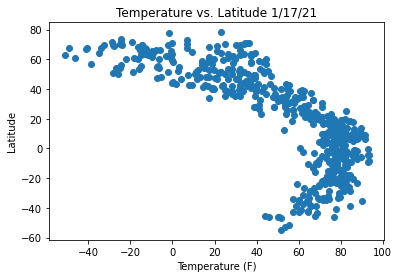

In [36]:
plt.scatter(weather_clean_df["Temperature (F)"], weather_clean_df["Lat"])
plt.title("Temperature vs. Latitude 1/17/21")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

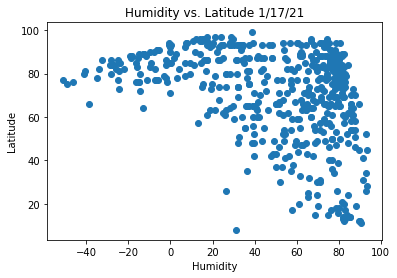

In [37]:
plt.scatter(weather_clean_df["Temperature (F)"], weather_clean_df["Humidity"])
plt.title("Humidity vs. Latitude 1/17/21")
plt.xlabel("Humidity")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

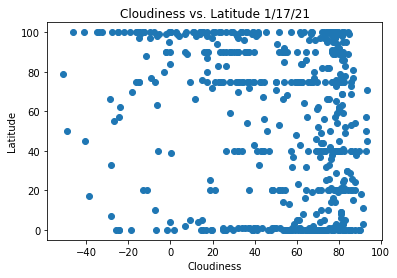

In [38]:
plt.scatter(weather_clean_df["Temperature (F)"], weather_clean_df["Cloudiness"])
plt.title("Cloudiness vs. Latitude 1/17/21")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

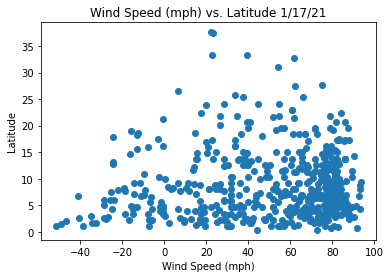

In [39]:
plt.scatter(weather_clean_df["Temperature (F)"], weather_clean_df["Wind Speed (mph)"])
plt.title("Wind Speed (mph) vs. Latitude 1/17/21")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")

In [40]:
northern_df = weather_clean_df.loc[weather_clean_df["Lat"] >= 0]

southern_df = weather_clean_df.loc[weather_clean_df["Lat"] < 0]



Text(0, 0.5, 'Latitude')

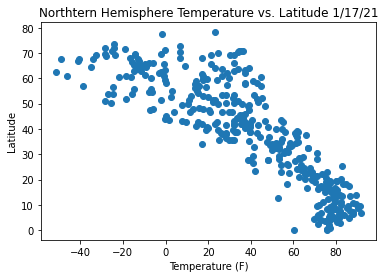

In [41]:
plt.scatter(northern_df["Temperature (F)"], northern_df["Lat"])
plt.title("Northtern Hemisphere Temperature vs. Latitude 1/17/21")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")


Text(0, 0.5, 'Latitude')

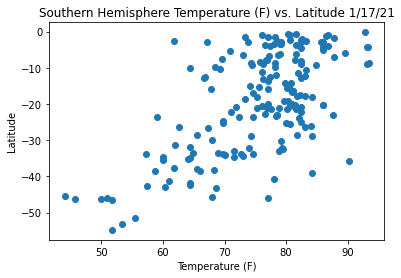

In [43]:
plt.scatter(southern_df["Temperature (F)"], southern_df["Lat"])
plt.title("Southern Hemisphere Temperature (F) vs. Latitude 1/17/21")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")